# Install and Import packeges

In [1]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime numpy scipy matplotlib pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=52be7a69f49965799d3a0de4f08bd90c222e0b012ab904716f1d14cfc167527a
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178

In [2]:
from qiskit import QuantumCircuit, transpile,QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.quantum_info import DensityMatrix, partial_trace, purity, Statevector, Pauli, entropy, state_fidelity
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import scipy.linalg
import math, itertools
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# **Creating |+> state and then measure it**

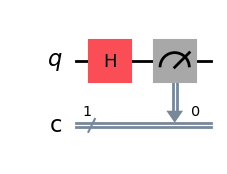

In [ ]:
qc1 = QuantumCircuit(1,1)
qc1.h(0)
qc1.measure(0,0)
qc1.draw('mpl')

## **Simulate the measurement**

*   AerSimulator → runs quantum circuits on a fast local simulator. It mimics real hardware so we can test circuits (with or without noise) before using an actual quantum computer.
*   Transpiler → converts our circuit into the gate set and qubit layout supported by the backend (simulator or real device). It also optimizes the circuit by removing extra gates and reducing errors.



{'1': 5004, '0': 4996}
Result(backend_name='aer_simulator', backend_version='0.17.2', job_id='4da0efb5-42f0-4d19-b89c-141931945778', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 5004, '0x0': 4996}), header={'creg_sizes': [['c', 1]], 'global_phase': 0.0, 'memory_slots': 1, 'n_qubits': 1, 'name': 'circuit-46', 'qreg_sizes': [['q', 1]], 'metadata': {}}, status=DONE, seed_simulator=2057513561, metadata={'time_taken': 0.013018339, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 1, 'sample_measure_time': 0.003449813, 'active_input_qubits': [0], 'num_clbits': 1, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12975, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.013018339)], date=202

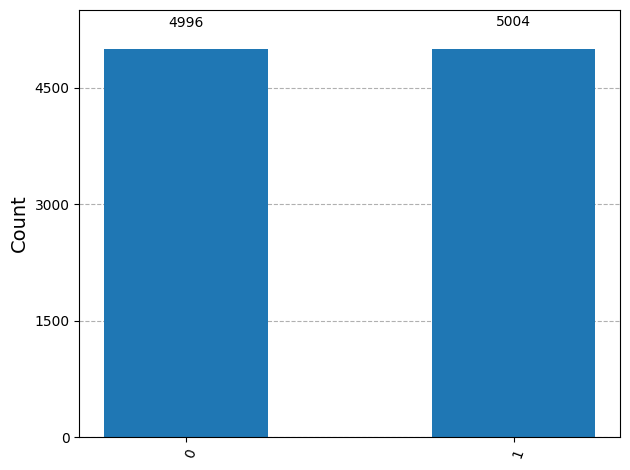

In [ ]:
simulator1 = AerSimulator()
qc1_transpiled = transpile(qc1, backend=simulator1)
job1 = simulator1.run(qc1_transpiled, shots=10000)
result1 = job1.result()
counts1 = result1.get_counts()
print(counts1)
print(result1)
plot_histogram(counts1)

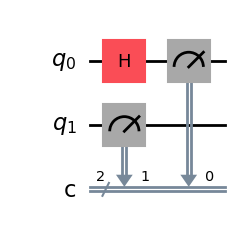

In [ ]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.measure([0,1],[0,1])
qc2.draw('mpl')

{'01': 489, '00': 535}


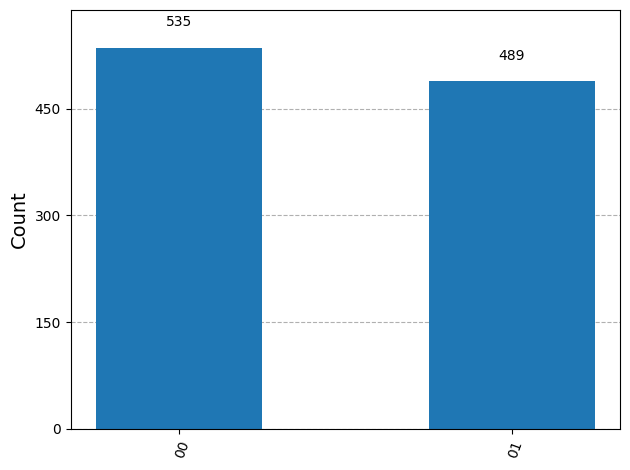

In [ ]:
simulator2 = AerSimulator()
qc2_transpiled = transpile(qc2, backend=simulator2)
job2 = simulator2.run(qc2_transpiled,shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()
print(counts2)
plot_histogram(counts2)

## Simulate Bell States

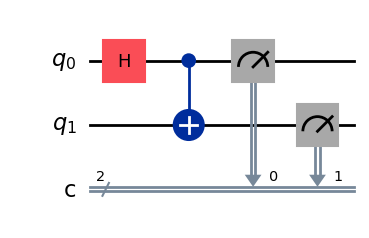

In [ ]:
qc3 = QuantumCircuit(2,2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure([0,1],[0,1])
qc3.draw('mpl')

{'00': 4922, '11': 5078}


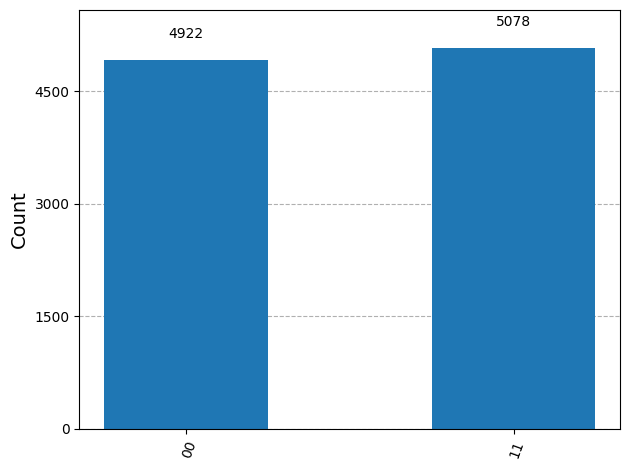

In [ ]:
Simulator3 = AerSimulator()
qc3_transpiled = transpile(qc3,backend=Simulator3)
job3 = Simulator3.run(qc3_transpiled,shots=10000)
result3 = job3.result()
counts3 = result3.get_counts()
print(counts3)
plot_histogram(counts3)

# **Measuring one qubit of a bipartite entangled state**

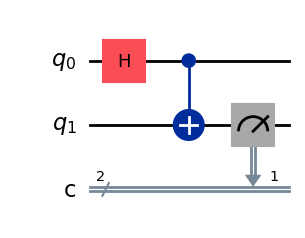

In [ ]:
qc4 = QuantumCircuit(2,2)
qc4.h(0)
qc4.cx(0,1)
qc4.measure(1,1)
qc4.draw('mpl')

{'00': 4976, '10': 5024}


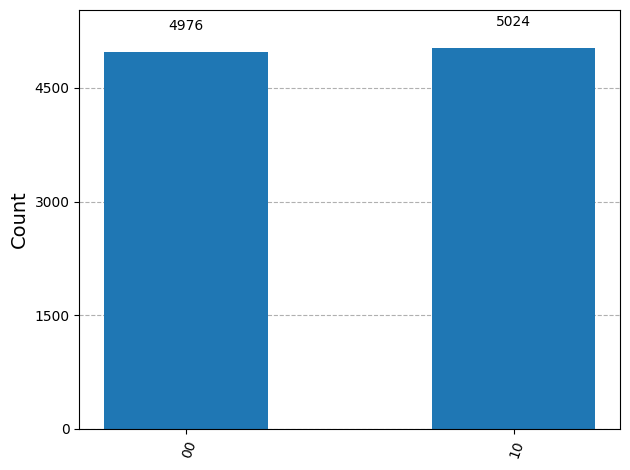

In [ ]:
Simulator4 = AerSimulator()
qc4_transpiled = transpile(qc4,backend=Simulator4)
job4 = Simulator4.run(qc4_transpiled,shots=10000)
result4 = job4.result()
counts4 = result4.get_counts()
print(counts4)
plot_histogram(counts4)

# **consecutive measurement simulations**

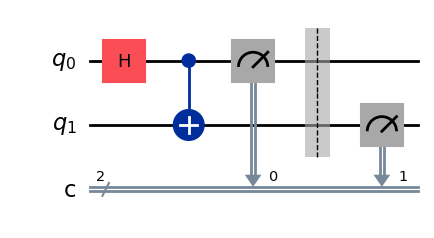

In [ ]:
qc5 = QuantumCircuit(2,2)
qc5.h(0)
qc5.cx(0,1)
qc5.measure(0,0)
qc5.barrier()
qc5.measure(1,1)
qc5.draw('mpl')

{'0': 4985, '1': 5015}


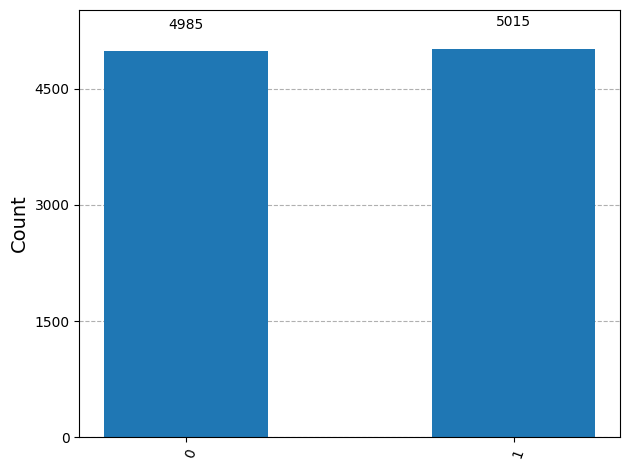

In [ ]:
Simulator5 = AerSimulator()
qc5_transpiled = transpile(qc5, backend=Simulator5)
job5 = Simulator5.run(qc1_transpiled,shots=10000)
result5 = job5.result()
counts5 = result5.get_counts()
print(counts5)
plot_histogram(counts5)

# **Density Matrix representation of Pure States and it's Bloch Sphere representation**

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


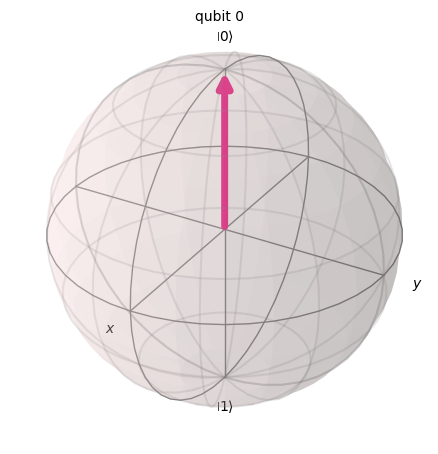

In [ ]:
qc6 = QuantumCircuit(1)
rho61 = DensityMatrix(qc6)
print(rho61.data)
plot_bloch_multivector(rho61)


[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


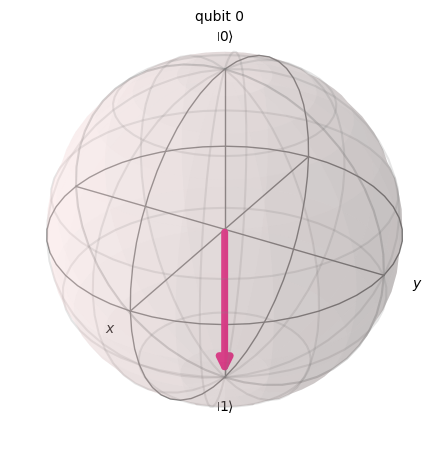

In [ ]:
qc6.x(0)
rho62 = DensityMatrix(qc6)
print(rho62.data)
plot_bloch_multivector(rho62)

[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]
(0.9999999999999996+0j)


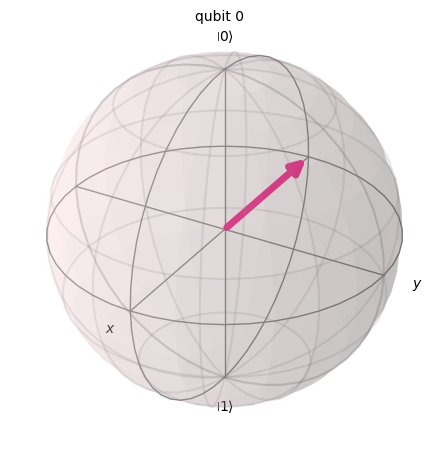

In [ ]:
qc6.h(0)
rho63 = DensityMatrix(qc6)
print(rho63.data)
print(purity(rho63))
plot_bloch_multivector(rho63)

# **Density Matrix representation of Mixed States and it's Bloch Sphere representation**

(0.9999999999999996+0j)
(0.4999999999999998+0j)
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


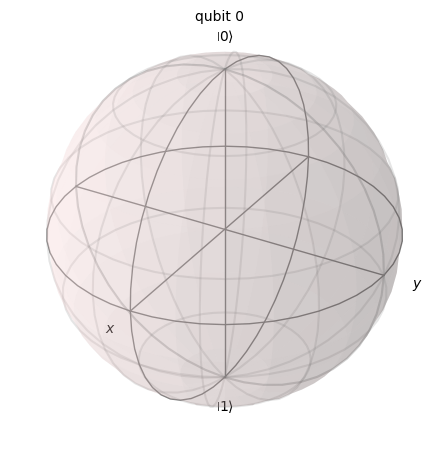

In [ ]:
qc7 = QuantumCircuit(2)
qc7.h(0)
qc7.cx(0,1)
rho7 = DensityMatrix(qc7)
print(purity(rho7))
reduced_rho7 = partial_trace(rho7,[1])
print(purity(reduced_rho7))
print(reduced_rho7.data)
plot_bloch_multivector(reduced_rho7)

# Combine Circuits in Qiskit

## 1. Appending
**append puts qc9 after qc8 on the same qubits.**

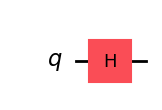

In [ ]:
qc8 = QuantumCircuit(1)
qc8.h(0)
qc8.draw('mpl')

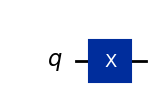

In [ ]:
qc9 = QuantumCircuit(1)
qc9.x(0)
qc9.draw('mpl')


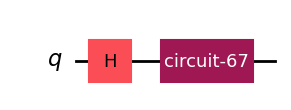

In [ ]:
qc8.append(qc9.to_instruction(),[0])
qc8.draw('mpl')

## 2. Composing
**compose returns a new circuit with qc2 applied after qc1.**

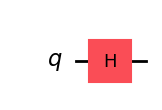

In [ ]:
qc10 = QuantumCircuit(1)
qc10.h(0)
qc10.draw('mpl')

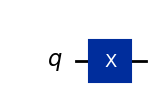

In [ ]:
qc11 = QuantumCircuit(1)
qc11.x(0)
qc11.draw('mpl')

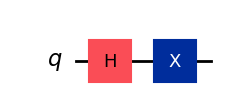

In [ ]:
qc12 = qc10.compose(qc11)
qc12.draw('mpl')

# Compute Expectation Value of a Given Operator


## Using Statevector

In [ ]:
#define single qubit Paulis
X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')
I = Pauli('I')
observables = [I,X,Y,Z]

#ex1 ∣ψ⟩ = ∣0⟩

sv1 = Statevector.from_label('0')
exp_val1 = [float(sv1.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for |0⟩ =",exp_val1)

#ex2 ∣ψ⟩ = ∣1⟩

sv2 = Statevector.from_label('1')
exp_val2 = [float(sv2.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for |1⟩ =",exp_val2)

#ex3 ∣ψ⟩ = ∣+⟩

sv3 = Statevector.from_label('+')
exp_val3 = [float(sv3.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for |+⟩ =",exp_val3)

#ex4 ∣ψ⟩ = ∣-⟩

sv4 = Statevector.from_label('-')
exp_val4 = [float(sv4.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for |-⟩ =",exp_val4)

#ex5 ∣ψ⟩ = root(1/3)∣0⟩ + root(2/3)∣1⟩
coefficients = [math.sqrt(1/3), math.sqrt(2/3)]
sv5 = Statevector(coefficients)
exp_val5 = [float(sv5.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for custom state =",exp_val5)


⟨I,X,Y,Z⟩ for |0⟩ = [1.0, 0.0, 0.0, 1.0]
⟨I,X,Y,Z⟩ for |1⟩ = [1.0, 0.0, 0.0, -1.0]
⟨I,X,Y,Z⟩ for |+⟩ = [0.9999999999999998, 0.9999999999999998, 0.0, 0.0]
⟨I,X,Y,Z⟩ for |-⟩ = [0.9999999999999998, -0.9999999999999998, 0.0, 0.0]
⟨I,X,Y,Z⟩ for custom state = [1.0, 0.9428090415820634, 0.0, -0.3333333333333333]


## Using Density Matrix

In [ ]:
# Define single-qubit Paulis
X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')
I = Pauli('I')
observables = [I, X, Y, Z]

# ex1 |ψ⟩ = |0⟩
rho1 = DensityMatrix.from_label('0')
exp_val1 = [float(rho1.expectation_value(op)) for op in observables]
print("⟨I,X,Y,Z⟩ for |0⟩ =", exp_val1)

# ex2 |ψ⟩ = |1⟩
rho2 = DensityMatrix.from_label('1')
exp_val2 = [float(rho2.expectation_value(op)) for op in observables]
print("⟨I,X,Y,Z⟩ for |1⟩ =", exp_val2)

# ex3 |ψ⟩ = |+⟩
rho3 = DensityMatrix.from_label('+')
exp_val3 = [float(rho3.expectation_value(op)) for op in observables]
print("⟨I,X,Y,Z⟩ for |+⟩ =", exp_val3)

# ex4 |ψ⟩ = |−⟩
rho4 = DensityMatrix.from_label('-')
exp_val4 = [float(rho4.expectation_value(op)) for op in observables]
print("⟨I,X,Y,Z⟩ for |−⟩ =", exp_val4)

# ex5 |ψ⟩ = √(1/3)|0⟩ + √(2/3)|1⟩
coefficients = [math.sqrt(1/3), math.sqrt(2/3)]
rho5 = DensityMatrix(coefficients)
exp_val5 = [float(rho5.expectation_value(observable)) for observable in observables]
print("⟨I,X,Y,Z⟩ for custom state =", exp_val5)


⟨I,X,Y,Z⟩ for |0⟩ = [1.0, 0.0, 0.0, 1.0]
⟨I,X,Y,Z⟩ for |1⟩ = [1.0, 0.0, 0.0, -1.0]
⟨I,X,Y,Z⟩ for |+⟩ = [0.9999999999999998, 0.9999999999999998, 0.0, 0.0]
⟨I,X,Y,Z⟩ for |−⟩ = [0.9999999999999998, -0.9999999999999998, 0.0, 0.0]
⟨I,X,Y,Z⟩ for custom state = [1.0, 0.9428090415820634, 0.0, -0.3333333333333333]


/tmp/ipython-input-2666644524.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val1 = [float(rho1.expectation_value(op)) for op in observables]
/tmp/ipython-input-2666644524.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val2 = [float(rho2.expectation_value(op)) for op in observables]
/tmp/ipython-input-2666644524.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val3 = [float(rho3.expectation_value(op)) for op in observables]
/tmp/ipython-input-2666644524.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val4 = [float(rho4.expectation_value(op)) for op in observables]
/tmp/ipython-input-2666644524.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val5 = [float(rho5.expectation_value(observable)) for observable in observables]


## Multi Qubit Expectation (Bell States)

In [ ]:
# Generate all 16 2-qubit Paulis
paulis_single = ['I','X','Y','Z']
paulis_2q = [a+b for a,b in itertools.product(paulis_single, repeat=2)]
observables = [Pauli(p) for p in paulis_2q]

# Generate the Bell State through QuantumCircuit
qc13 = QuantumCircuit(2)
qc13.h(0)
qc13.cx(0,1)

# transform QuantumCircuit to a Statevector
sv6 = Statevector.from_instruction(qc13)

exp_val6 = [float(sv6.expectation_value(observable)) for observable in observables]
print(exp_val6)

[0.9999999999999998, 0.0, 0.0, 0.0, 0.0, 0.9999999999999998, 0.0, 0.0, 0.0, 0.0, -0.9999999999999998, 0.0, 0.0, 0.0, 0.0, 0.9999999999999998]


## Using Estimator

### Single qubit state

In [ ]:
# Define single-qubit Paulis
X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')
I = Pauli('I')
observables = [I, X, Y, Z]

# Create Estimator instance
estimator = Estimator()

# Example state |ψ⟩ = |+⟩
qc14 = QuantumCircuit(1)   # default is |0⟩
qc14.h(0)

# Run estimator for each observable
exp_vals = []
for obs in observables:
    job = estimator.run([(qc14, obs)])   # circuit + observable
    result = job.result()
    value = float(result[0].data.evs)    # extract expectation
    exp_vals.append(value)

print("⟨I,X,Y,Z⟩ for |0⟩ =", exp_vals)

⟨I,X,Y,Z⟩ for |0⟩ = [1.0, 1.0, 0.0, 0.0]


### Multi Qubit

In [ ]:
# 2 qubit pauli gates
paulis_single = ['I','X','Y','Z']
pauli_strings = [''.join(p) for p in itertools.product(paulis_single, repeat=2)]
observables = [Pauli(p) for p in pauli_strings]

# Create Estimator instance
estimator = Estimator()

# Example state |Φ+⟩ = ​(∣00⟩+∣11⟩)/root(2)
qc15 = QuantumCircuit(2)   # default is |0⟩
qc15.h(0)
qc15.cx(0,1)

# Run estimator for each observable
exp_vals15 = []
for obs in observables:
    job15 = estimator.run([(qc15, obs)])
    result15 = job15.result()
    val15 = float(result15[0].data.evs)
    exp_vals15.append(val15)

# Print results nicely
for p, v in zip(pauli_strings, exp_vals15):
    print(f"⟨{p}⟩ = {v:.3f}")

⟨II⟩ = 1.000
⟨IX⟩ = 0.000
⟨IY⟩ = 0.000
⟨IZ⟩ = 0.000
⟨XI⟩ = 0.000
⟨XX⟩ = 1.000
⟨XY⟩ = 0.000
⟨XZ⟩ = 0.000
⟨YI⟩ = 0.000
⟨YX⟩ = 0.000
⟨YY⟩ = -1.000
⟨YZ⟩ = 0.000
⟨ZI⟩ = 0.000
⟨ZX⟩ = 0.000
⟨ZY⟩ = 0.000
⟨ZZ⟩ = 1.000


# Generating parameterised bell state

We can create a family of entangled states by applying a single–qubit rotation $R_y(\theta)$
on the first qubit of $|00\rangle$, followed by a CNOT gate:

$$
|\psi(\theta)\rangle
= R_y(\theta)\otimes I \; |00\rangle \;\;\xrightarrow{\text{CNOT}}\;\;
\cos\!\left(\tfrac{\theta}{2}\right)|00\rangle \;+\; \sin\!\left(\tfrac{\theta}{2}\right)|11\rangle
$$

- For $\theta = 0$: $|\psi(0)\rangle = |00\rangle$ (no entanglement).  
- For $\theta = \tfrac{\pi}{2}$: $|\psi(\tfrac{\pi}{2})\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ (maximally entangled Bell state).  
- For $\theta = \pi$: $|\psi(\pi)\rangle = |11\rangle$.  

The gate $R_y(\theta)$ performs a rotation about the Bloch sphere's $y$-axis:

$$
R_y(\theta) =
\begin{bmatrix}
\cos\!\tfrac{\theta}{2} & -\sin\!\tfrac{\theta}{2} \\
\sin\!\tfrac{\theta}{2} & \cos\!\tfrac{\theta}{2}
\end{bmatrix}
$$

In [ ]:
# define function for parameterised bell state
def parameterised_bell(theta):
    """
    Creates a 2-qubit parameterized Bell state circuit
    and returns both the circuit and its density matrix.

    Args:
        theta (float): rotation angle for RY gate

    Returns:
        qc (QuantumCircuit): the quantum circuit
        rho (DensityMatrix): density matrix of the final state
    """
    qc = QuantumCircuit(2)
    qc.ry(theta,0)
    qc.cx(0,1)
    rho = DensityMatrix.from_instruction(qc)

    return qc, rho



ρ for θ=0:
 DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))

ρ for θ=π/2:
 DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))

ρ for θ=π:
 DensityMatrix([[3.74939946e-33+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 6.12323400e-17+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [6.12323400e-17+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 1.00000000e+00+0.j]],
              dims=(2, 2))


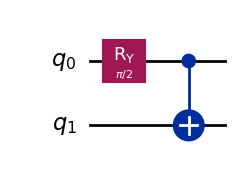

In [ ]:
# θ = 0 → should give |00>
qc0, rho0 = parameterised_bell(0)
print("ρ for θ=0:\n", rho0)

# θ = π/2 → Bell state (|00>+|11>)/√2
qc_half, rho_half = parameterised_bell(np.pi/2)
print("\nρ for θ=π/2:\n", rho_half)

# θ = π → should give |11>
qc_pi, rho_pi = parameterised_bell(np.pi)
print("\nρ for θ=π:\n", rho_pi)

# Draw one example circuit
qc_half.draw('mpl')


# Generating Parameterised GHZ State

The Greenberger–Horne–Zeilinger (GHZ) state for 3 qubits is

$$
|GHZ\rangle = \tfrac{1}{\sqrt{2}}\big(|000\rangle + |111\rangle\big).
$$

We can generalize this into a *parameterized GHZ family* by applying a single-qubit
rotation $R_y(\theta)$ on the first qubit of $|000\rangle$ and then entangling with
the others via CNOT gates:

$$
|\psi(\theta)\rangle = \cos\!\left(\tfrac{\theta}{2}\right)|000\rangle
+ \sin\!\left(\tfrac{\theta}{2}\right)|111\rangle
$$

- For $\theta = 0$: $|\psi(0)\rangle = |000\rangle$ (no entanglement).  
- For $\theta = \tfrac{\pi}{2}$: $|\psi(\tfrac{\pi}{2})\rangle = \tfrac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$ (maximally entangled GHZ state).  
- For $\theta = \pi$: $|\psi(\pi)\rangle = |111\rangle$.  

The $R_y(\theta)$ gate is defined as a rotation about the Bloch sphere $y$-axis:

$$
R_y(\theta) =
\begin{bmatrix}
\cos\!\tfrac{\theta}{2} & -\sin\!\tfrac{\theta}{2} \\
\sin\!\tfrac{\theta}{2} & \cos\!\tfrac{\theta}{2}
\end{bmatrix}.
$$

In [ ]:
# define function for parameterised GHZ state
def parameterised_ghz(theta):
    """
    Creates a 3-qubit parameterized GHZ state circuit
    and returns both the circuit and its density matrix.

    Args:
        theta (float): rotation angle for RY gate

    Returns:
        qc (QuantumCircuit): the quantum circuit
        rho (DensityMatrix): density matrix of the final state
    """
    qc = QuantumCircuit(3)
    qc.ry(theta,0)
    qc.cx(0,1)
    qc.cx(0,2)
    rho = DensityMatrix.from_instruction(qc)

    return qc, rho



State at θ=0: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
State at θ=π/2: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
State at θ=π: Statevector([6.123234e-17+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 1.000000e+00+0.j],
            dims=(2, 2, 2))


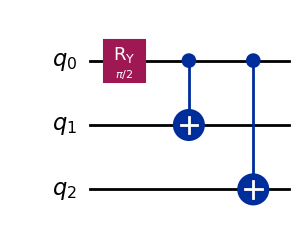

In [ ]:
# θ = 0 → |000>
qc0, rho0 = parameterised_ghz(0)
print("State at θ=0:", Statevector.from_instruction(qc0))

# θ = π/2 → GHZ state (|000>+|111>)/√2
qc_half, rho_half = parameterised_ghz(np.pi/2)
print("State at θ=π/2:", Statevector.from_instruction(qc_half))

# θ = π → |111>
qc_pi, rho_pi = parameterised_ghz(np.pi)
print("State at θ=π:", Statevector.from_instruction(qc_pi))

# Draw the GHZ circuit at θ=π/2
qc_half.draw('mpl')


# Measure of Purity and Entropy

## Purity of a Quantum State

For a density matrix $\rho$, the **purity** is defined as

$$
\text{Purity} = \mathrm{Tr}(\rho^2).
$$

- If $\text{Purity} = 1$, the state is **pure**.  
- If $\text{Purity} < 1$, the state is **mixed**.  
- For a maximally mixed state of $n$ qubits, the purity is $\tfrac{1}{2^n}$.

**Examples:**
- Single qubit:  
  - $|0\rangle\langle 0| \;\;\Rightarrow\;\; \text{Purity} = 1$  
  - $\tfrac{1}{2}(|0\rangle\langle 0| + |1\rangle\langle 1|) \;\;\Rightarrow\;\; \text{Purity} = 0.5$  
- Two qubits: maximally mixed state has $\text{Purity} = 0.25$.  
- Parameterized Bell and GHZ states:  
  - Full state is always pure ($\text{Purity} = 1$).  
  - Reduced subsystems have purity $< 1$ when entangled.


In [ ]:
# Single Qubit Example

# Pure state |0>
rho0 = DensityMatrix.from_label('0')
print("Purity of |0> =", purity(rho0))

# Mixed state: 50% |0>, 50% |1>
rho_mixed = 0.5 * DensityMatrix.from_label('0') + 0.5 * DensityMatrix.from_label('1')
print("Purity of maximally mixed 1-qubit =", purity(rho_mixed))  # should be 0.5

Purity of |0> = (1+0j)
Purity of maximally mixed 1-qubit = (0.5+0j)


In [ ]:
# Multi Qubit Example (Bell state)

qc_bell, rho_bell = parameterised_bell(np.pi/2)
print("Purity of full Bell state =", purity(rho_bell))

# Partial trace to get single-qubit reduced density matrix

rho_bell_reduced = partial_trace(rho_bell, [1])   # trace out qubit 1

print("Purity of reduced Bell state (1 qubit) =", purity(rho_bell_reduced))

Purity of full Bell state = (1+0j)
Purity of reduced Bell state (1 qubit) = (0.5+0j)


## Von Neumann Entropy


For a density matrix $\rho$, the von Neumann entropy is

$$
S(\rho) = - \mathrm{Tr}(\rho \log_2 \rho).
$$

- $S(\rho) = 0$ for a pure state.  
- $S(\rho) > 0$ for mixed states.  
- For a maximally mixed $n$-qubit state, $S(\rho) = n$.


In [ ]:
# Pure state |0>

rho0 = DensityMatrix.from_label('0')
print("Entropy of |0> =", entropy(rho0, base=2))

# Maximally mixed 1-qubit

rho_mix = 0.5 * DensityMatrix.from_label('0') + 0.5 * DensityMatrix.from_label('1')
print("Entropy of maximally mixed 1-qubit =", entropy(rho_mix, base=2))

# Bell state (reduced qubit shows entanglement entropy = 1)

qc16, rho16 = parameterised_bell(np.pi/2)
rho16_reduced = partial_trace(rho16,[0])
print("Entropy of  Bell state =", entropy(rho16, base=2))
print("Entropy of reduced Bell state =", entropy(rho16_reduced, base=2))

Entropy of |0> = 0.0
Entropy of maximally mixed 1-qubit = 1.0
Entropy of  Bell state = 4.199997326979098e-15
Entropy of reduced Bell state = 1.0


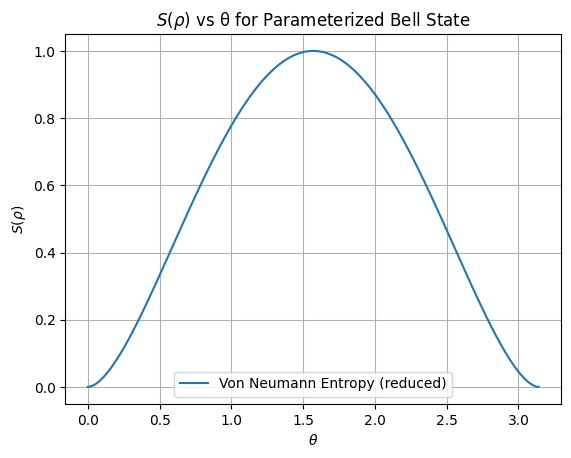

In [ ]:
# Parameterized Bell State – Entropy vs θ

thetas = np.linspace(0, np.pi, 500)
entropy_vals = []

for t in thetas:
    rho = parameterised_bell(t)[1]
    rho_reduced = partial_trace(rho, [0])
    entropy_vals.append(entropy(rho_reduced, base=2))

plt.plot(thetas, entropy_vals, label="Von Neumann Entropy (reduced)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$S(\rho)$")
plt.title(r"$S(\rho)$ vs θ for Parameterized Bell State")
plt.legend();
plt.grid();
plt.show()

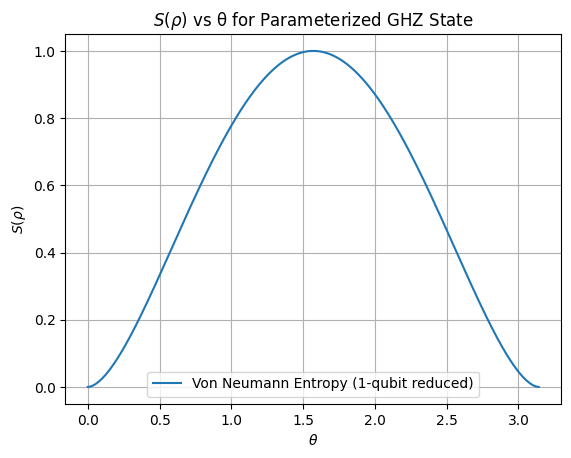

In [ ]:
# Parameterized GHZ State – Entropy vs θ

thetas = np.linspace(0, np.pi, 500)
entropy_vals_ghz = []

for t in thetas:
    rho = parameterised_ghz(t)[1]
    rho_reduced = partial_trace(rho, [1,2])  # trace out qubits 1 and 2
    entropy_vals_ghz.append(entropy(rho_reduced, base=2))

plt.plot(thetas, entropy_vals_ghz, label="Von Neumann Entropy (1-qubit reduced)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$S(\rho)$")
plt.title(r"$S(\rho)$ vs θ for Parameterized GHZ State")
plt.legend();
plt.grid();
plt.show()

## Concurrence


**Concurrence** is an entanglement measure defined for 2-qubit states.  
It quantifies the degree of quantum correlation between the qubits.

For a 2-qubit density matrix $\rho$:

1. Define the **spin-flipped matrix**:
$$
\tilde{\rho} = (Y \otimes Y)\, \rho^* \, (Y \otimes Y),
$$
where $\rho^*$ is the complex conjugate of $\rho$, and $Y$ is the Pauli-$Y$ matrix.

2. Construct:
$$
R = \sqrt{\;\sqrt{\rho}\,\tilde{\rho}\,\sqrt{\rho}\;}
$$

3. Let $\{\lambda_i\}$ be the eigenvalues of $R$, sorted in decreasing order.

4. The **concurrence** is:
$$
C(\rho) = \max\Big(0, \lambda_1 - \lambda_2 - \lambda_3 - \lambda_4\Big).
$$

- $C = 0$ → state is separable (not entangled).  
- $C = 1$ → state is maximally entangled (e.g., Bell states).  
- Intermediate values indicate partial entanglement.


In [ ]:
# define a function for concurrence

def concurrence(rho):
    # NOTE:
    # In Qiskit, a DensityMatrix object (rho) is a wrapper that stores
    # the quantum state along with some metadata.
    # The actual numerical matrix is stored in rho.data (as a NumPy array).
    # Since matrix operations (e.g., @, eigvals, kron) require plain NumPy arrays,
    # we always use rho.data when performing linear algebra.

    rho = rho.data
    Y = np.array([[0,-1j],[1j,0]])
    Y2 = np.kron(Y,Y)
    rho_star = np.conjugate(rho)
    rho_tilda = Y2 @ rho_star @ Y2 # np.matmul(a,b) = a @ b
    sqrt_rho = scipy.linalg.sqrtm(rho)
    rho_final = sqrt_rho @ rho_tilda @ sqrt_rho
    R = scipy.linalg.sqrtm(rho_final)

    evals = np.sort(np.real(np.linalg.eigvals(R)))
    concurrence = max(0,evals[3]-evals[2]-evals[1]-evals[0])
    return concurrence

In [ ]:
# Separable 2-qubit state |00>
rho_sep = DensityMatrix.from_label('00')
print("Concurrence of |00> =", concurrence(rho_sep))

# Bell state at θ = π/2
qc_bell, rho_bell = parameterised_bell(np.pi/2)
print("Concurrence of Bell state =", concurrence(rho_bell))

Concurrence of |00> = 0
Concurrence of Bell state = 1.0


/tmp/ipython-input-4283284113.py:16: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_rho = scipy.linalg.sqrtm(rho)
/tmp/ipython-input-4283284113.py:18: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  R = scipy.linalg.sqrtm(rho_final)


/tmp/ipython-input-4283284113.py:16: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_rho = scipy.linalg.sqrtm(rho)
/tmp/ipython-input-4283284113.py:18: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  R = scipy.linalg.sqrtm(rho_final)


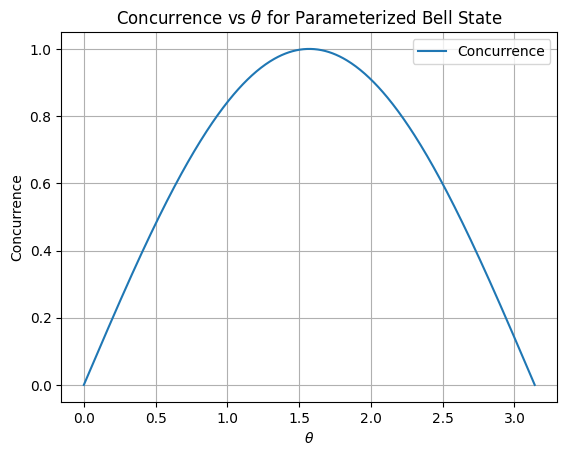

In [ ]:
# parameterised bell state concurrence vs θ

thetas = np.linspace(0,np.pi,500)
concurrence_vals = []

for t in thetas:
    rho = parameterised_bell(t)[1]
    concurrence_vals.append(concurrence(rho))

plt.plot(thetas, concurrence_vals, label="Concurrence")
plt.xlabel(r"$\theta$")
plt.ylabel("Concurrence")
plt.title(r"Concurrence vs $\theta$ for Parameterized Bell State")
plt.legend();
plt.grid();
plt.show()

## Entanglement of Formation (EOF)



The **entanglement of formation** quantifies the resources needed to create a bipartite entangled state.  
It is directly related to the **concurrence** $C(\rho)$ of a two–qubit state.

For a 2-qubit density matrix $\rho$, the EOF is defined as:

$$
E_F(\rho) = h\!\left(\frac{1 + \sqrt{1 - C(\rho)^2}}{2}\right),
$$

where $h(x)$ is the binary entropy function:

$$
h(x) = -x \log_2 x - (1-x)\log_2(1-x).
$$

- $E_F = 0$ → separable (no entanglement).  
- $E_F = 1$ → maximally entangled (e.g., Bell state).  
- Intermediate values indicate partial entanglement.


In [ ]:
# define Binary Entropy

def binary_entropy(x):
    if x<=0 or x>=1:
        return 0.0
    return -x*np.log2(x)-(1-x)*np.log2(1-x)

# define Entanglement of Formation

def entanglement_of_formation(rho):
    Concurrence_value = concurrence(rho)
    return binary_entropy((1+np.sqrt(1-Concurrence_value**2))/2)


In [ ]:
# Separable 2-qubit state |00>
rho_sep = DensityMatrix.from_label('00')
print("Entanglement of formation of |00> =", entanglement_of_formation(rho_sep))

# Bell state at θ = π/2
qc_bell, rho_bell = parameterised_bell(np.pi/2)
print("Entanglement of formation of Bell state =", entanglement_of_formation(rho_bell))

Entanglement of formation of |00> = 0.0
Entanglement of formation of Bell state = 1.0


/tmp/ipython-input-4283284113.py:16: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_rho = scipy.linalg.sqrtm(rho)
/tmp/ipython-input-4283284113.py:18: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  R = scipy.linalg.sqrtm(rho_final)


/tmp/ipython-input-4283284113.py:16: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  sqrt_rho = scipy.linalg.sqrtm(rho)
/tmp/ipython-input-4283284113.py:18: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  R = scipy.linalg.sqrtm(rho_final)


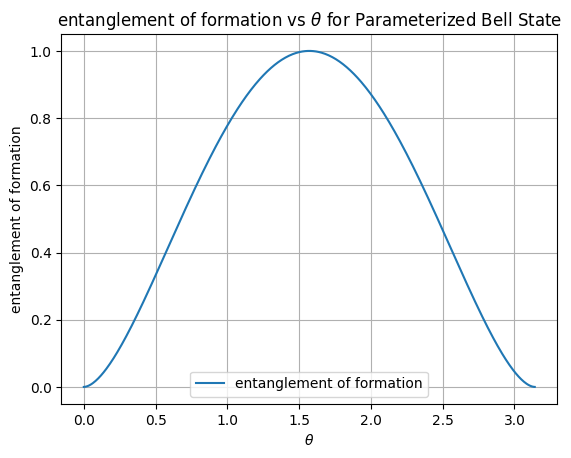

In [ ]:
# parameterised bell state entanglement of formation vs θ

thetas = np.linspace(0,np.pi,500)
entanglement_of_formation_vals = []

for t in thetas:
    rho = parameterised_bell(t)[1]
    entanglement_of_formation_vals.append(entanglement_of_formation(rho))

plt.plot(thetas, entanglement_of_formation_vals, label="entanglement of formation")
plt.xlabel(r"$\theta$")
plt.ylabel("entanglement of formation")
plt.title(r"entanglement of formation vs $\theta$ for Parameterized Bell State")
plt.legend();
plt.grid();
plt.show()


# Quantum Teleportation (Basic Circuit with Protocol)

**The Goal**

Teleport an unknown quantum state
∣
𝜓
⟩
∣ψ⟩ from Alice (qubit 0) to Bob (qubit 2), using:

An entangled Bell pair (between qubits 1 and 2).

A Bell measurement on Alice’s side.

Two classical bits sent to Bob.

Correction gates by Bob.

At the end → Bob’s qubit (qubit 2) has the original state
∣
𝜓
⟩
∣ψ⟩.

In [ ]:
def simulate_teleportation(alpha, beta, show_plots = True):
    """Simulate quantum teleportation for an arbitrary qubit |ψ> = α|0> + β|1>."""
    # Build teleportation circuit
    # |ψ⟩ = α|0⟩ + β|1⟩ is the state to be teleported.
    qc = QuantumCircuit(3,2)

    # Prepare message state on qubit 0
    norm = np.sqrt(abs(alpha)**2+abs(beta)**2)
    alpha, beta = alpha/norm, beta/norm
    qc.initialize([alpha,beta],0)

    # Create entangled Bell pair (qubits 1 & 2)
    qc.h(1)
    qc.cx(1,2)
    qc.barrier()

    # Bell measurement on Alice’s qubits (0 & 1)
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])
    qc.barrier()

    # Conditional operations (Bob corrects)
    qc.cx(1,2)
    qc.cz(0,2)

    qc.save_statevector()

    # Run on AerSimulator
    simulator = AerSimulator()
    qc_transpiled = transpile(qc,simulator)
    result = simulator.run(qc_transpiled,shots=10000).result()
    qc_statevector = result.get_statevector(qc_transpiled)

    #Extract Bob's qubit (trace out Alice's)
    bob_state = partial_trace(qc_statevector,[0,1])

    #Calculate fidelity
    psi_original = Statevector([alpha,beta])
    fidelity = state_fidelity(psi_original,bob_state)

    return {"circuit":qc, "bob state":bob_state,"fidelity":fidelity}



**Example 1**

Teleport (|0>+|1>)/√2

bob state : DensityMatrix([[0.5+0.000000e+00j, 0.5+6.123234e-17j],
               [0.5-6.123234e-17j, 0.5+0.000000e+00j]],
              dims=(2,))
fidelity: 1.0


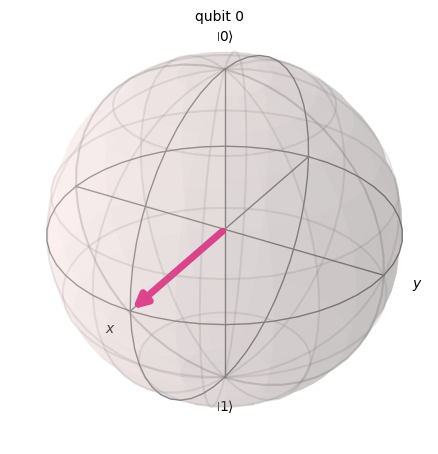

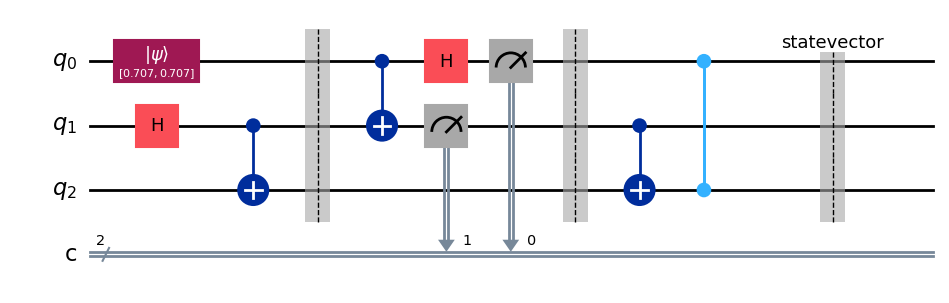

In [ ]:
# define the coefficients
alpha1, beta1 = 1/np.sqrt(2), 1/np.sqrt(2)

result1 = simulate_teleportation(alpha1,beta1)
qc1 = result1['circuit']
print(f"bob state : {result1['bob state']}")
print(f"fidelity: {result1['fidelity']}")
display(plot_bloch_multivector(result1['bob state']))
display(qc1.draw('mpl'))


**Example 1**

Teleport (|0>-|1>)/√2

bob state : DensityMatrix([[ 0.5+0.000000e+00j, -0.5-6.123234e-17j],
               [-0.5+6.123234e-17j,  0.5+0.000000e+00j]],
              dims=(2,))
fidelity: 1.0


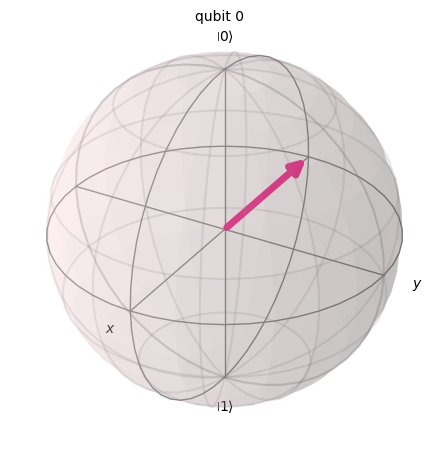

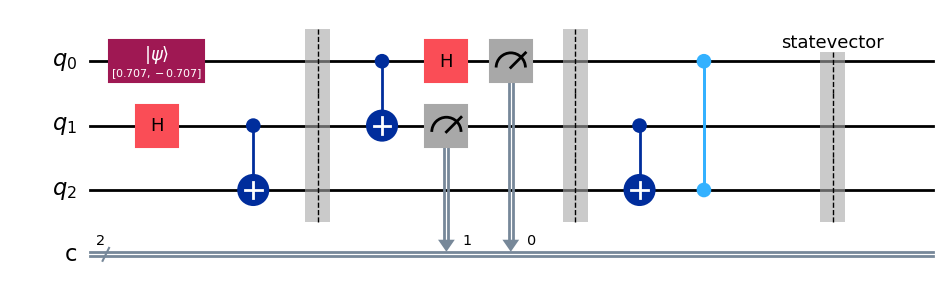

In [ ]:
# define the coefficients
alpha2, beta2 = 1/np.sqrt(2), -1/np.sqrt(2)

result2 = simulate_teleportation(alpha2,beta2)
qc2 = result2['circuit']
print(f"bob state : {result2['bob state']}")
print(f"fidelity: {result2['fidelity']}")
display(plot_bloch_multivector(result2['bob state']))
display(qc2.draw('mpl'))


**Example 1**

Teleport 0.6|0>+0.8|1>

bob state : DensityMatrix([[0.36+0.00000000e+00j, 0.48+5.87830464e-17j],
               [0.48-5.87830464e-17j, 0.64+0.00000000e+00j]],
              dims=(2,))
fidelilty: 1.0


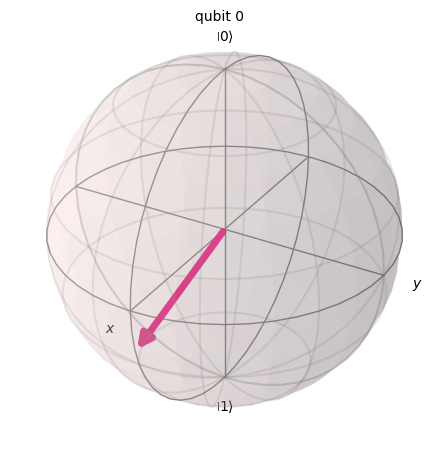

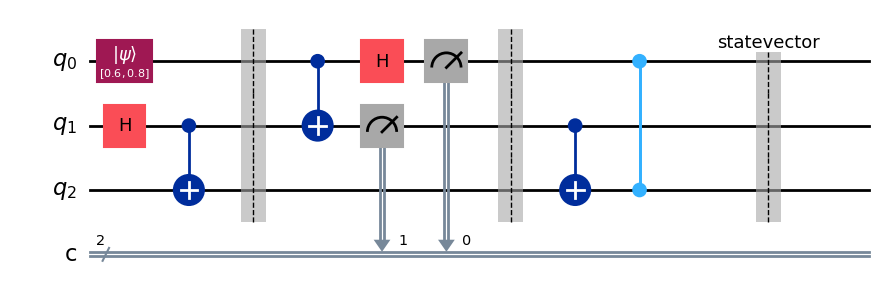

In [ ]:
# define the coefficients
alpha3,beta3 = 0.6,0.8

result3 = simulate_teleportation(alpha3,beta3)

qc3 = result3['circuit']
print(f"bob state : {result3['bob state']}")
print(f"fidelilty: {result3['fidelity']}")
display(plot_bloch_multivector(result3['bob state']))
display(qc3.draw('mpl'))

## Superdense Coding Protocol

Superdense coding is a quantum communication protocol that allows someone (Alice) to send **two classical bits** of information (like 00, 01, 10, or 11) to someone else (Bob) by physically sending only **one qubit**.

The "catch" is that Alice and Bob must share a pair of **entangled** qubits *before* the communication starts.

---

### How It Works (The Steps)

Here is the general process:

**1. Preparation:**
* A pair of entangled qubits (a **Bell state**) is created.
* One qubit (let's call it Qubit A) is given to **Alice**.
* The other qubit (Qubit B) is given to **Bob**. They can be very far apart.

**2. Encoding (Alice's Job):**
Alice wants to send a 2-bit message. She performs a specific operation (a quantum gate) on **her qubit only (Qubit A)** based on the message she wants to send:

* **To send 00:** She does nothing (applies an Identity gate).
* **To send 01:** She applies an **X gate** (a bit-flip).
* **To send 10:** She applies a **Z gate** (a phase-flip).
* **To send 11:** She applies a **Y gate** (both an X and a Z gate).

Applying this gate to her qubit instantly changes the *total state* of the entangled pair. Each of the four messages transforms the pair into one of four unique (and distinguishable) Bell states.

**3. Transmission:**
* Alice sends her qubit (Qubit A) to Bob. This is the *only* physical communication that happens.

**4. Decoding (Bob's Job):**
* Bob now has both qubits (Qubit A from Alice and his original Qubit B).
* To read the message, he performs a "Bell-state measurement" on the pair.
* This is done by first applying a **CNOT gate** and then a **Hadamard gate** to the qubits, and *then* measuring both.

The result of his measurement will be 00, 01, 10, or 11, which is **exactly** the 2-bit message Alice sent.



*(This circuit diagram shows: 1. Qubits are entangled (Hadamard + CNOT). 2. A barrier separates Alice, who applies one of four gates (I, X, Z, or Y) to her qubit. 3. Bob receives Alice's qubit, applies a CNOT and a Hadamard, and then measures both.)*

---

### Why Is It Important?

* **Efficiency:** It proves that a quantum channel (sending 1 qubit) can have **double the capacity** of a classical channel (which can only send 1 bit) for transmitting classical information.
* **Power of Entanglement:** It's a perfect example of entanglement being a useful **resource**. The pre-shared entanglement is what makes the "extra" capacity possible.
* **The "Opposite" of Teleportation:** Superdense coding is often compared to quantum teleportation:
    * **Superdense Coding:** Uses 1 qubit of entanglement + 1 qubit sent **to send 2 classical bits**.
    * **Quantum Teleportation:** Uses 1 qubit of entanglement + 2 classical bits sent **to send 1 qubit**.

In [5]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# The message to send
message_to_send = '10'

#  1. Setup Circuit ---
qc = QuantumCircuit(2, 2)

#  2. Create Entangled Pair (Step 1) ---
qc.h(0)
qc.cx(0, 1)
qc.barrier()

#  3. Alice Encodes: '10' (Step 2)
if message_to_send == '10':
    qc.z(0)
qc.barrier()

#  4. Bob Decodes (Step 4) ---
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# --- 5. Measurement ---
qc.measure(0, 0) # Measure q0
qc.measure(1, 1) # Measure q1

# Print the circuit
print(f"Circuit for sending '{message_to_send}':")
print(qc.draw('text'))

#  6. Simulation
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

#  7. Show Results ---
print("\nResults:")
print(counts)
plot_histogram(counts, title=f"Result: Sent '{message_to_send}'")
plt.show()

Circuit for sending '10':
     ┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
q_0: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
          └───┘ ░       ░ └───┘      ░  ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1 

Results:
{'01': 1024}
